# **Artifical Intelligance** 

---


### Explorating IMDB 






The purpose for this exploration is to implement deep learning into figuring out if a film review is positive or negative efficiently.

I will do this by first assembling a dataset (IMDB) which includes 50,000 film reviews for binary sentiment classification, this will mean that they're categorised by only 2 categories to ensure that the movie is either positive or negative. The measure of success is classification accuracy this is because we use an equal number of samples to each class, this works for IMDB because there are 25,000 training reviews and 25,000 testing reviews. The training samples will be split into two sections, the first sample of 15,000 is extracted and used for the training set and the 10,000 samples were used to create a validation set, the model was training using the training data and the validated using the validation data. Binary_crossentropy with the accuracy metric are the functions used to calculate the loss and will provide values of loss and accuracy, this is then used as a feedback signal so that it can adjust the weights so that the loss score decreases, and the accuracy increase if implement correctly.




The dataset that we are using now has to be prepared, we first do this by importing the useful dataset from tensorlow.keras.dataset which has the dataset in a pre-processed state which has every word assigned to an integer. Instead of using the whole dictionary of words used in the dataset which was above 80,000 words I reduced the size of the dataset to 10,000 of the most frequent words used to make a more manageable size to work with. The dataset is split into two and will include the training data and the test data which include the reviews and the labels which includes 1s and 0s to show which review is positive and which review is negative. The data was formatted in a way that would allow for the machine learning model to work as the lists were transformed into tensors which allowed the reviews to be vectorised which would fit in the 10,000 numbers. 




## **Creating an improved baseline model**

---

The input data and target data are ready so then now we can train modules.

To start, create a module that uses statistical power that will beat the suggested baseline of 50% accuracy. The model is designed using a rmsprop optimiser with a default learning rate and last layer being the sigmoid, because of the binary classification it will include the loss function. The initial model has two layers, it has a relu activation layer as well as 5 hidden units and a sigmoid activation layer of 1. Giving the module 20 epochs this allows for the module to develop. Includes a batch size of 512 and the validation data results on top of the training data results. 

In [ ]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:] 

17464789/17464789 [==============================] - 0s 0us/step


## Model 1: 5 hidden units

---



In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(5, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 50005     
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 50,011
Trainable params: 50,011
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5196 - accuracy: 0.7924 - val_loss: 0.4275 - val_accuracy: 0.8515
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3579 - accuracy: 0.8916 - val_loss: 0.3512 - val_accuracy: 0.8772
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2874 - accuracy: 0.9135 - val_loss: 0.3194 - val_accuracy: 0.8816
Epoch 4/20
30/30 [=======

This bit of code is used as the matplotlib graph requires them as inputs

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

This code creates a graph that represents the loss quantity.

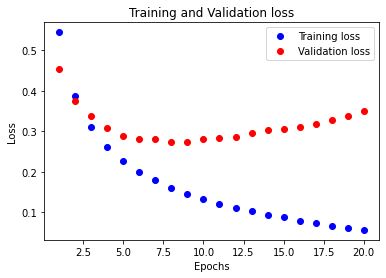

In [ ]:
import matplotlib.pyplot as plt
    
def plot_loss():

    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    red_dots = 'ro'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, red_dots, label = 'Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
plot_loss()

This code creates a graph that represents the accuracy quantity.

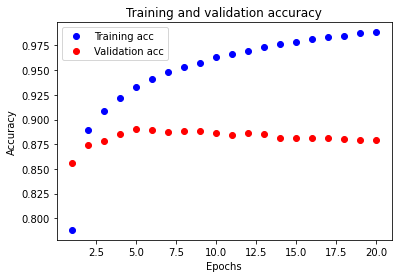

In [ ]:
def plot_accuracy():
    
    plt.clf()

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'ro', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    
plot_accuracy()

## Model 1: Performance 


---


|Model # |Number of layers | Number of hidden units | Regularisation Used | Results |
|:-----------:|:-----------:|:---------------------:|:------------:|:------------:|
1 | 2 | 5,1 | N/A | Best loss 0.2742, best accuracy at 0.8910.

The table shows information like the model number, number of layers used in the experiment 

This model as well as all the models are validated using the 10,000 samples from the validation set to figure out how well the test data would do, the best accuracy was 0.8910 at 8 epochs and the best loss was 0.2742 at 8 epochs as well. The accuracy was way above 50% so this means that the training of the network can start and be carried out correctly.






## Developing a model that overfits 

Because of the underfitting that was present in model 1 one, building a model that will overfit so that we can implement regularisation to resolve the overfitting will allow us to get a model that will give us the best results, as well as the more models we create you find out what the best and optimum model will be.


## Model 2: 30 hidden units

---



In [ ]:
model = models.Sequential()
model.add(layers.Dense(30, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                300030    
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 300,061
Trainable params: 300,061
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 4s 131ms/step - loss: 0.4835 - accuracy: 0.8006 - val_loss: 0.3752 - val_accuracy: 0.8598
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2938 - accuracy: 0.9068 - val_loss: 0.3018 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2219 - accuracy: 0.9312 - val_loss: 0.2801 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==

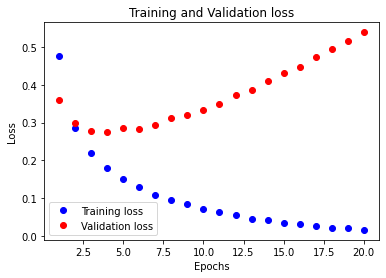

In [ ]:
plot_loss()

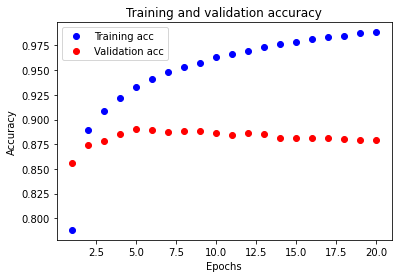

In [ ]:
plot_accuracy()

## Model 2: Performance

---

|Model # |Number of layers | Number of hidden units | Regularisation Used | Results |
|:-----------:|:-----------:|:---------------------:|:------------:|:------------:|
1 | 2 | 5,1 | N/A | Best loss 0.2742, best accuracy at 0.8910.
2 | 2 | 30,1 | N/A | Best loss 0.2737, best accuracy 0.8906. 

model 2 has the best loss of 0.2737 and the best accuracy of 0.8906 like the first one, however the loss after the 4th epoch increases drastically and the peak performance was hit very early on. This model had the best loss out of all the models so far. This model experienced overfitting. 




## Tuning the hyperparameters and regularisation of the model

---

When a model overfits, the hyperparameters must be adjusted and it must implement regularising, this includes adding dropout lays, adding layers, L1/L2 regularisation. This is what is done in further models 



## Model 3: hidden units to 15

---





In [ ]:
model = models.Sequential()
model.add(layers.Dense(15, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 15)                150015    
                                                                 
 dense_19 (Dense)            (None, 1)                 16        
                                                                 
Total params: 150,031
Trainable params: 150,031
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 3s 87ms/step - loss: 0.5120 - accuracy: 0.8019 - val_loss: 0.4423 - val_accuracy: 0.8031
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3316 - accuracy: 0.8982 - val_loss: 0.3332 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2562 - accuracy: 0.9217 - val_loss: 0.2980 - val_accuracy: 0.8898
Epoch 4/20
30/30 [===

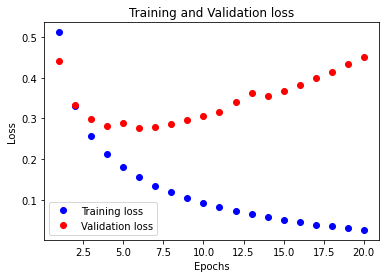

In [ ]:
plot_loss()

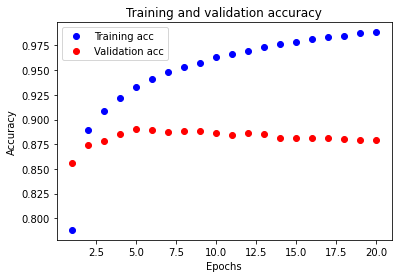

In [ ]:
plot_accuracy()

## Model 3: performance

---

|Model # |Number of layers | Number of hidden units | Regularisation Used | Results |
|:-----------:|:-----------:|:---------------------:|:------------:|:------------:|
1 | 2 | 5,1 | N/A | Best loss 0.2742, best accuracy at 0.8910.
2 | 2 | 30,1 | N/A | Best loss 0.2737, best accuracy 0.8906. 
3 | 2 | 15,1 | N/A | Best loss 0.2775, best accuracy 0.8927. 

The output of model 3 got the best loss of 0.2775 and the best accuracy of 0.8927. This had the best accuracy of any model and the best accuracy was hit very early on epoch number 4 and the best loss at epoch 6. This model produced better results and better overfitting than model 2 so I will consider this model in my final model.

In the next experiment i will tune model 3 to decrease overfitting and to create a final model that i can use. The next step is to add another layer.


## Model 4: add a layer 

---



In [ ]:
model = models.Sequential()
model.add(layers.Dense(15, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(15, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 15)                150015    
                                                                 
 dense_21 (Dense)            (None, 15)                240       
                                                                 
 dense_22 (Dense)            (None, 1)                 16        
                                                                 
Total params: 150,271
Trainable params: 150,271
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 4s 99ms/step - loss: 0.5463 - accuracy: 0.7723 - val_loss: 0.4266 - val_accuracy: 0.8725
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3470 - accuracy: 0.9009 - val_loss: 0.3327 - val_accuracy: 0.8867
Epoch 3/20
30/30 [===========

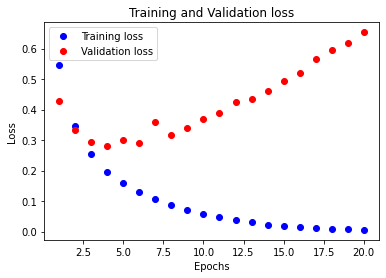

In [ ]:
plot_loss()

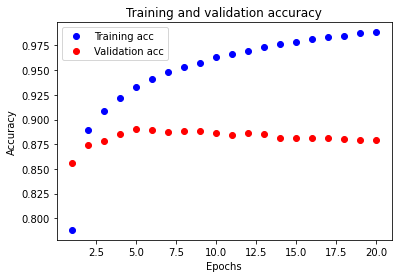

In [ ]:
plot_accuracy()

## Model 4 Performance

---

|Model # |Number of layers | Number of hidden units | Regularisation Used | Results |
|:-----------:|:-----------:|:---------------------:|:------------:|:------------:|
1 | 2 | 5,1 | N/A | Best loss 0.2742, best accuracy at 0.8910.
2 | 2 | 30,1 | N/A | Best loss 0.2737, best accuracy 0.8906. 
3 | 2 | 15,1 | N/A | Best loss 0.2775, best accuracy 0.8927. 
4 | 3 | 15,15,1 | N/A | Best loss 0.2790, best accuracy 0.8905. 

Model 4 achieved a best loss of 0.2790 and the best accuracy of 0.8905 which was reached at the epoch of 4, very similar to model 3 but the results were worse than model 3 because of the drastic increase in the loss more than model 3. Because of this I most likely will not consider this in the final implementation. 



## Model 5: hidden units to 8

---



In [ ]:
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 8)                 80008     
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 80,017
Trainable params: 80,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 4s 69ms/step - loss: 0.5637 - accuracy: 0.7917 - val_loss: 0.4725 - val_accuracy: 0.8584
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4066 - accuracy: 0.8871 - val_loss: 0.3875 - val_accuracy: 0.8742
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3238 - accuracy: 0.9068 - val_loss: 0.3366 - val_accuracy: 0.8833
Epoch 4/20
30/30 [====

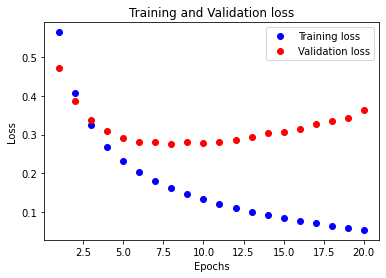

In [ ]:
plot_loss()

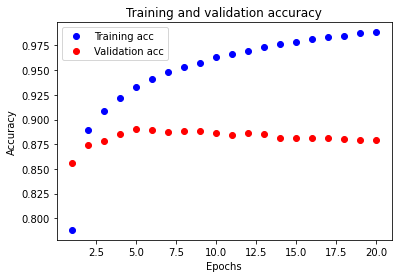

In [ ]:
plot_accuracy()

## Model 5: performance

---



|Model # |Number of layers | Number of hidden units | Regularisation Used | Results |
|:-----------:|:-----------:|:---------------------:|:------------:|:------------:|
1 | 2 | 5,1 | N/A | Best loss 0.2742, best accuracy at 0.8910.
2 | 2 | 30,1 | N/A | Best loss 0.2737, best accuracy 0.8906. 
3 | 2 | 15,1 | N/A | Best loss 0.2775, best accuracy 0.8927. 
4 | 3 | 15,15,1 | N/A | Best loss 0.2790, best accuracy 0.8905. 
5 | 2 | 8,1 | N/A | Best loss 0.2757, best accuracy 0.8915. 

The best loss achieved was 0.2757 at epoch 8 and the best accuracy was 0.8915 at epoch 5, this was a slight change for model 3 however overfitting was reduced and because of that I will consider this in the final model. 

## Model 6: Adding a dropout 0.5

---



In [ ]:
model = models.Sequential()
model.add(layers.Dense(15, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 15)                150015    
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 16        
                                                                 
Total params: 150,031
Trainable params: 150,031
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5526 - accuracy: 0.7416 - val_loss: 0.4468 - val_accuracy: 0.8559
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4038 - accuracy: 0.8543 - val_loss: 0.3640 - val_accuracy: 0.8777
Epoch 3/20
30/30 [===========

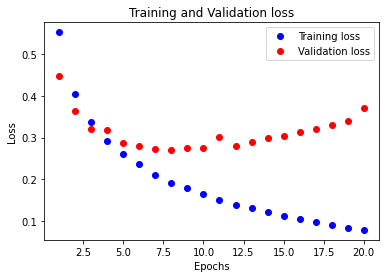

In [ ]:
plot_loss()

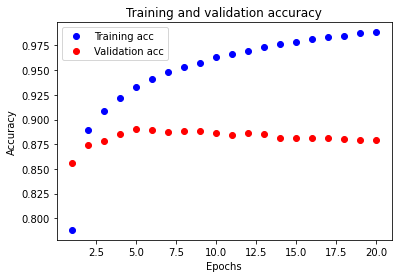

In [ ]:
plot_accuracy()

## Model 6: performance

---

|Model # |Number of layers | Number of hidden units | Regularisation Used | Results |
|:-----------:|:-----------:|:---------------------:|:------------:|:------------:|
1 | 2 | 5,1 | N/A | Best loss 0.2742, best accuracy at 0.8910.
2 | 2 | 30,1 | N/A | Best loss 0.2737, best accuracy 0.8906. 
3 | 2 | 15,1 | N/A | Best loss 0.2775, best accuracy 0.8927. 
4 | 3 | 15,15,1 | N/A | Best loss 0.2790, best accuracy 0.8905. 
5 | 2 | 8,1 | N/A | Best loss 0.2757, best accuracy 0.8915. 
6 | 3 | 15,1 | dropout 0.5 | Best loss 0.2710, best accuracy 0.8908.

The best loss that was achieved was 0.2710 and the best accuracy at 0.8908 at epoch 8 which is a reduced overfitting for our results. This will be implemented in my final model even if the result is similar because it reduces overfitting it will be useful in my final model.


## Model 7: Add L1 regularisation

---



In [ ]:
model = models.Sequential()
model.add(layers.Dense(15, kernel_regularizer=regularizers.l1(0.001),activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 15)                150015    
                                                                 
 dense_28 (Dense)            (None, 1)                 16        
                                                                 
Total params: 150,031
Trainable params: 150,031
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 3s 78ms/step - loss: 1.0041 - accuracy: 0.7591 - val_loss: 0.6773 - val_accuracy: 0.8190
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.6286 - accuracy: 0.8410 - val_loss: 0.6178 - val_accuracy: 0.8433
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5946 - accuracy: 0.8483 - val_loss: 0.5959 - val_accuracy: 0.8501
Epoch 4/20
30/30 [==

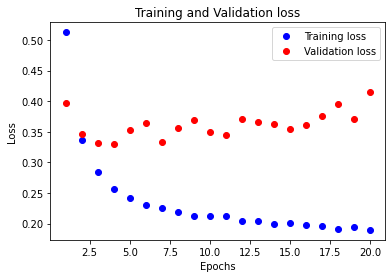

In [ ]:
plot_loss()

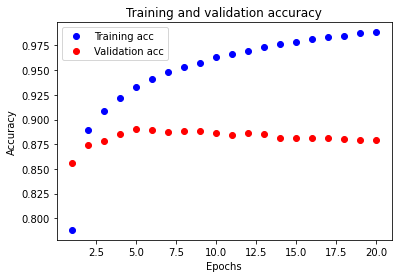

In [ ]:
plot_accuracy()

## Model 7: performance

---

|Model # |Number of layers | Number of hidden units | Regularisation Used | Results |
|:-----------:|:-----------:|:---------------------:|:------------:|:------------:|
1 | 2 | 5,1 | N/A | Best loss 0.2742, best accuracy at 0.8910.
2 | 2 | 30,1 | N/A | Best loss 0.2737, best accuracy 0.8906. 
3 | 2 | 15,1 | N/A | Best loss 0.2775, best accuracy 0.8927. 
4 | 3 | 15,15,1 | N/A | Best loss 0.2790, best accuracy 0.8905. 
5 | 2 | 8,1 | N/A | Best loss 0.2757, best accuracy 0.8915. 
6 | 3 | 15,1 | dropout 0.5 | Best loss 0.2710, best accuracy 0.8908.
7 | 3 | 15,1 | L1 | Best loss 0.5243, best accuracy 0.8609.

The best loss was 0.5243 almost double the original model 3 and the accuracy at 0.8609 which is less than the original model, with this conclusion I won't be using this in my final model.


## Model 8: Add L2 regularisation

---



In [ ]:
model = models.Sequential()

model.add(layers.Dense(15, kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 15)                150015    
                                                                 
 dense_34 (Dense)            (None, 1)                 16        
                                                                 
Total params: 150,031
Trainable params: 150,031
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 6s 133ms/step - loss: 0.5296 - accuracy: 0.7933 - val_loss: 0.4183 - val_accuracy: 0.8714
Epoch 2/20
30/30 [==============================] - 2s 70ms/step - loss: 0.3586 - accuracy: 0.9000 - val_loss: 0.3610 - val_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 3s 85ms/step - loss: 0.3009 - accuracy: 0.9181 - val_loss: 0.3388 - val_accuracy: 0.8870
Epoch 4/20
30/30 [=

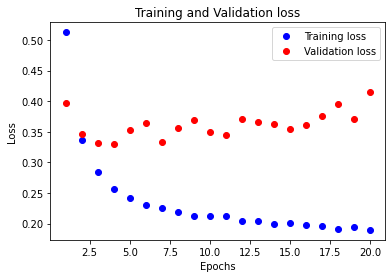

In [ ]:
plot_loss()

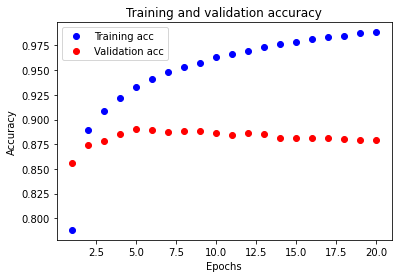

In [ ]:
plot_accuracy()

## Model 8: Performance

---

|Model # |Number of layers | Number of hidden units | Regularisation Used | Results |
|:-----------:|:-----------:|:---------------------:|:------------:|:------------:|
1 | 2 | 5,1 | N/A | Best loss 0.2742, best accuracy at 0.8910.
2 | 2 | 30,1 | N/A | Best loss 0.2737, best accuracy 0.8906. 
3 | 2 | 15,1 | N/A | Best loss 0.2775, best accuracy 0.8927. 
4 | 3 | 15,15,1 | N/A | Best loss 0.2790, best accuracy 0.8905. 
5 | 2 | 8,1 | N/A | Best loss 0.2757, best accuracy 0.8915. 
6 | 3 | 15,1 | dropout 0.5 | Best loss 0.2710, best accuracy 0.8908.
7 | 3 | 15,1 | L1 | Best loss 0.5243, best accuracy 0.8609.
8 | 2 | 15,1 | L2 | Best loss 0.3305, best accuracy 0.8890.

The findings show the best loss for this was 0.3305 and the best accuracy at 0.8890, these results are lower than other results that can be more accurate, however this shows more consistent results and the loss stays relatively low and does not go too high compared to others that increase in loss the more epoch that runs. This will be implemented into my final module

From these finding I have decided to implement the following additions, I will be changing the hyperparameters in the hidden layer from 15 to 8, I will be adding a dropout of 0.5 and I will be adding an L2 regularisation which are the two modification I will be applying. 



## Model 9: 8 hidden units, L2, dropout 0.5

---



In [ ]:
model = models.Sequential()

model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 80008     
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 80,017
Trainable params: 80,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 4s 96ms/step - loss: 0.6126 - accuracy: 0.6572 - val_loss: 0.5215 - val_accuracy: 0.8497
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5028 - accuracy: 0.7773 - val_loss: 0.4554 - val_accuracy: 0.8609
Epoch 3/20
30/30 [==============

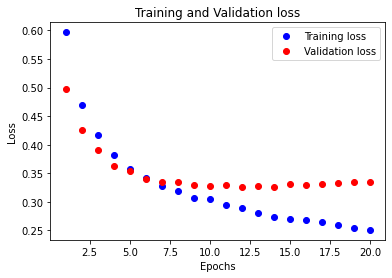

In [ ]:
plot_loss()

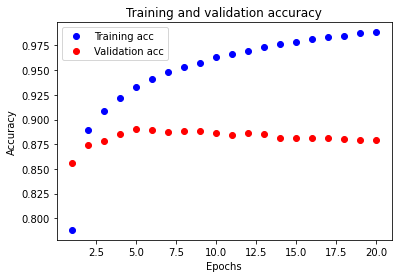

In [ ]:
plot_accuracy()

## Model 9: Performance

---

|Model # |Number of layers | Number of hidden units | Regularisation Used | Results |
|:-----------:|:-----------:|:---------------------:|:------------:|:------------:|
1 | 2 | 5,1 | N/A | Best loss 0.2742, best accuracy at 0.8910.
2 | 2 | 30,1 | N/A | Best loss 0.2737, best accuracy 0.8906. 
3 | 2 | 15,1 | N/A | Best loss 0.2775, best accuracy 0.8927. 
4 | 3 | 15,15,1 | N/A | Best loss 0.2790, best accuracy 0.8905. 
5 | 2 | 8,1 | N/A | Best loss 0.2757, best accuracy 0.8915. 
6 | 3 | 15,1 | dropout 0.5 | Best loss 0.2710, best accuracy 0.8908.
7 | 3 | 15,1 | L1 | Best loss 0.5243, best accuracy 0.8609.
8 | 2 | 15,1 | L2 | Best loss 0.3305, best accuracy 0.8890.
9 | 3 | 8,1 | L2, dropout 0.5 | Best loss 0.3367, best accuracy 0.8866.

Model 9 has the best loss of 0.3367 and the best accuracy of 0.8866, this model also has the most consistent accuracy I came across and the validation loss consistently going down as well.

I will reduce the epoch size to 10 on the because consistently throughout my testing overfitting would start around 10 epochs, so for this reason I am going to apply this to the test dataset so that it is optimum.


## Model 9: Final model: 8 hidden units, L2, dropout 0.5

---

In [ ]:
model = models.Sequential()
model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 512)

results = model.evaluate(x_test, y_test)

results

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 80008     
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 80,017
Trainable params: 80,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
49/49 [==============================] - 2s 25ms/step - loss: 0.5396 - accuracy: 0.7462
Epoch 2/10
49/49 [==============================] - 1s 25ms/step - loss: 0.4074 - accuracy: 0.8458
Epoch 3/10
49/49 [==============================] - 1s 25ms/step - loss: 0.3650 - accuracy: 0.8666
Epoch 4/10
49/49 

[0.320555180311203, 0.8860399723052979]

This result above shows that the network achieved a 0.3206 loss and 0.8860 accuracy on the whole test dataset. This is consistent throughout the experiments. This is not 100% accuracy so you will find the wrong label assigned to a review.

## Conclusion

---

To conclude, I was able to create a model that predicts if the film review is positive or negative at an 88% accuracy rate with minimal loss. Using a deep learning workflow allowed for an effective and stable model as shown. This was shown when using a validation set to check if the way of working would not only be good and work well for training data but also real test data. This was achieved by using many techniques like adjusting the hyperparameters and using regularisation and how that affects your data.

With all this the conclusion is that the outputs can be predicted from the inputs and the data was more than enough to work with and produce results. 

## References

---
Jérémie, W. (2022), *Artificial Intellience Module Leader: Lecture Notes*, London: Goldsmiths,University of London.
Chollet, F. (2021), *Deep Learning with Python*, Shelter Island: Manning.
IMDB dataset 